In [80]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import *
from scipy import stats

from pathlib import Path

NathanPath="d:\Documents\Info\INF554\INF554_Kaggle_Project"

In [78]:
project_path = str(Path(os.getcwd()).parent.absolute())
print("Current directory : " + os.getcwd() + ", Project directory : " + project_path)

Current directory : d:\Documents\Info\INF554\INF554_Kaggle_Project, Project directory : d:\Documents\Info\INF554\INF554_Kaggle_Project


In [82]:
os.chdir(project_path)
os.chdir(NathanPath)

In [83]:

# Read training data
df_train = pd.read_csv('data/train.csv', dtype={'author': np.int64, 'hindex': np.float32})
n_train = df_train.shape[0]

# Read test data
df_test = pd.read_csv('data/test.csv', dtype={'author': np.int64})
n_test = df_test.shape[0]

## I) Create indicators

In [84]:
# Load the graph
G = nx.read_edgelist('data/coauthorship.edgelist', delimiter=' ', nodetype=int)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges() 
print('Number of nodes:', n_nodes)
print('Number of edges:', n_edges)

Number of nodes: 217801
Number of edges: 1718164


In [85]:
nx.set_node_attributes(G,dict(nx.degree(G)),"degree")
nx.set_node_attributes(G,dict(nx.clustering(G)),"clustering_coef")
nx.set_node_attributes(G,dict(nx.square_clustering(G)),"sq_clustering_coef")
nx.set_node_attributes(G,dict(nx.average_neighbor_degree(G)),"mean_neighbors_degree")

In [ ]:
nx.readwrite.graphml.write_graphml(G,'Indicators/graph_with_ind2.xml')

## II) Use indicators

In [ ]:
G2=nx.readwrite.graphml.read_graphml('Indicators/graph_with_ind2.xml')

In [ ]:
train_dict=[(a,b) for a,b in np.array(df_train, dtype=np.int64)]
id_train=[str(i) for i,_ in train_dict]

G_train=G2.subgraph(id_train)
print(G_train)

h_index_train=[x for _,x in train_dict]
degree_train=np.array([d for x,d in G_train.nodes("degree")])
clust_coef_train=np.array([d for x,d in G_train.nodes("clustering_coef")])
sq_clust_coef_train=np.array([d for x,d in G_train.nodes("sq_clustering_coef")])
neighb_degree_train=np.array([d for x,d in G_train.nodes("mean_neighbors_degree")])

def normalize(X):
    return (X-np.mean(X))/np.std(X)
n_h_index_train=normalize(h_index_train)
n_degree_train=normalize(degree_train)
n_clust_coef_train=normalize(clust_coef_train)
n_sq_clust_coef_train=normalize(sq_clust_coef_train)
n_neighb_degree_train=normalize(neighb_degree_train)

Graph with 174241 nodes and 1112719 edges


In [ ]:
def cov(X,Y):
    return np.mean((X-np.mean(X))*(Y-np.mean(Y)))
def corr(X,Y):
    return np.sqrt(cov(X,Y))
def softmax(X):
    return np.exp(X)/(1+np.exp(X))

In [ ]:
chi2_h_degree=corr(n_h_index_train,n_degree_train)
chi2_h_clust_coef=corr(n_h_index_train,n_clust_coef_train)
chi2_h_sq_clust_coef=corr(n_h_index_train,n_sq_clust_coef_train)
chi2_h_neighb_degree=corr(n_h_index_train,n_neighb_degree_train)
chi2_degree_neighb_degree=corr(n_degree_train,n_neighb_degree_train)
print(chi2_h_degree,chi2_h_clust_coef,chi2_h_sq_clust_coef, chi2_h_neighb_degree, chi2_degree_neighb_degree)

0.086567269651956 0.23653261897602343 0.26354202017316736 0.9557700936236234


Le h-index est peu corrélé de manière directe au degré et au degré des voisins (meileur h-index, id=2426470670, h-index=187, degré=8 et degré_voisins=11.75)

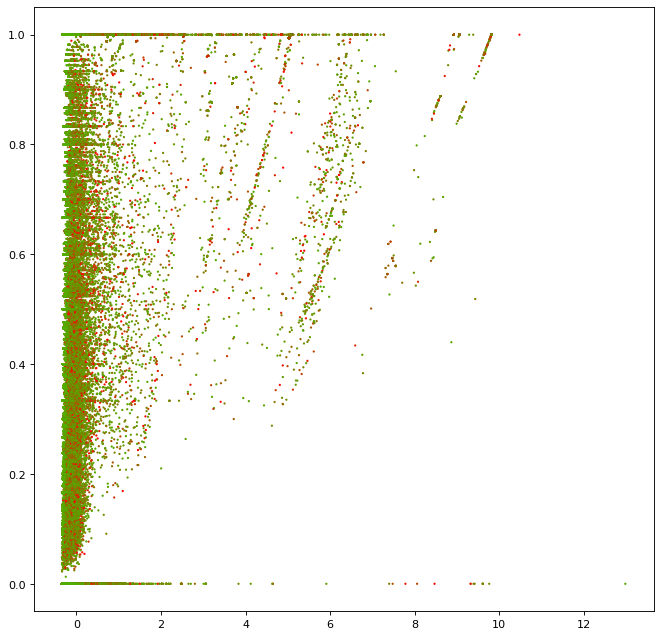

In [ ]:
colors=[[softmax(n_h_index_train[x]),(1-softmax(n_h_index_train[x])),0] for x in range(len(n_h_index_train))]
colors2=[ colors[x] if n_h_index_train[x]>np.mean(n_h_index_train) else [1,1,1] for x in range(len(n_h_index_train))]
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(n_neighb_degree_train,clust_coef_train, c=colors, s=1)

plt.show()